In [44]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
%matplotlib inline

In [37]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()
rng = np.random.RandomState(1)



Applying DecisionTreeRegressor
---

3007.37041442
Residual sum of squares: 3007.37
Variance score: 0.38


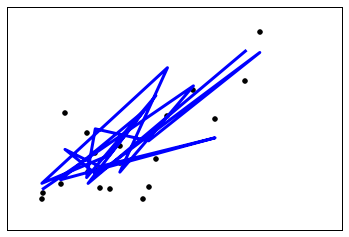

In [39]:
bagging_regressor=BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=4, max_samples=.70, max_features=1.0,
                 bootstrap=True, bootstrap_features=True, oob_score=False, warm_start=False, n_jobs=1,
                 random_state=0, verbose=0).fit(diabetes_X_train, diabetes_y_train)


print mean_squared_error(diabetes_y_test, bagging_regressor.predict(diabetes_X_test))    
print("Residual sum of squares: %.2f"
      % np.mean((bagging_regressor.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % bagging_regressor.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
#plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
 #        linewidth=3)
#Bagger
plt.plot(diabetes_X_test, bagging_regressor.predict(diabetes_X_test), color='blue',
         linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

Applying GradientBoosting
---

2677.61998812
Residual sum of squares: 2677.62
Variance score: 0.45


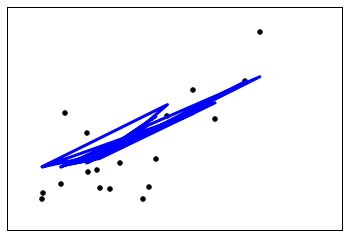

In [43]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0,
                                loss='ls',max_features=1,subsample=.2)

bagging_regressor=BaggingRegressor(base_estimator=gradient_boosting_regressor, n_estimators=300, max_samples=.70, max_features=1.0,
                 bootstrap=True, bootstrap_features=True, oob_score=False, warm_start=False, n_jobs=2,
                 random_state=0, verbose=0).fit(diabetes_X_train, diabetes_y_train)


print mean_squared_error(diabetes_y_test, bagging_regressor.predict(diabetes_X_test))    
print("Residual sum of squares: %.2f"
      % np.mean((bagging_regressor.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % bagging_regressor.score(diabetes_X_test, diabetes_y_test))


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, bagging_regressor.predict(diabetes_X_test), color='blue',
         linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

Applying AdaBoostRegressor
---

In [81]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1,
                                                        random_state=0,
                                loss='ls',max_features=1,subsample=.5)
ab=AdaBoostRegressor(base_estimator=gradient_boosting_regressor)


bagging_regressor=BaggingRegressor(base_estimator=ab,max_samples=.80, max_features=1.0,
                 bootstrap=True, bootstrap_features=True, oob_score=False, warm_start=False, n_jobs=2,
                 random_state=0, verbose=0).fit(diabetes_X_train, diabetes_y_train)

print mean_squared_error(diabetes_y_test, bagging_regressor.predict(diabetes_X_test))    
print("Residual sum of squares: %.2f"
      % np.mean((bagging_regressor.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % bagging_regressor.score(diabetes_X_test, diabetes_y_test))



2719.97848285
Residual sum of squares: 2719.98
Variance score: 0.44


Applying SVM
---

In [95]:
svr_regressor = SVR(C=900.0, epsilon=0.4)
bagging_regressor=BaggingRegressor(base_estimator=svr_regressor,max_samples=.80, max_features=1.0,
                 bootstrap=True, bootstrap_features=True, oob_score=False, warm_start=False, n_jobs=2,
                 random_state=0, verbose=0).fit(diabetes_X_train, diabetes_y_train)

print mean_squared_error(diabetes_y_test, bagging_regressor.predict(diabetes_X_test))    
print("Residual sum of squares: %.2f"
      % np.mean((bagging_regressor.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % bagging_regressor.score(diabetes_X_test, diabetes_y_test))


2332.20320373
Residual sum of squares: 2332.20
Variance score: 0.52


In [106]:
svm_score=cross_val_score(bagging_regressor,diabetes_X_test,diabetes_y_test,cv=5)

In [107]:
print "Cross validation score for SVM Bagging",svm_score.mean(),svm_score.std() *2

Cross validation score for SVM Bagging 0.181650761633 0.34957645354


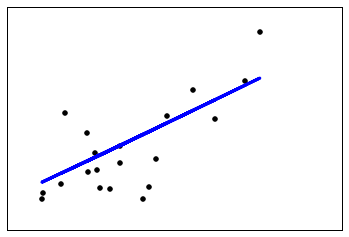

In [108]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, bagging_regressor.predict(diabetes_X_test), color='blue',
         linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

Ada Boost Regressor with SVM 
---

In [109]:
svr_regressor = SVR(C=1e3, epsilon=0.4)

ab=AdaBoostRegressor(base_estimator=svr_regressor, n_estimators=100, learning_rate=.2, loss='linear', random_state=None)
bagging_regressor=BaggingRegressor(base_estimator=svr_regressor,max_samples=.70, max_features=1.0,
                 bootstrap=True, bootstrap_features=True, oob_score=False, warm_start=True, n_jobs=2,
                 random_state=0, verbose=0).fit(diabetes_X_train, diabetes_y_train)

print mean_squared_error(diabetes_y_test, bagging_regressor.predict(diabetes_X_test))    
print("Residual sum of squares: %.2f"
      % np.mean((bagging_regressor.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % bagging_regressor.score(diabetes_X_test, diabetes_y_test))


2327.49301524
Residual sum of squares: 2327.49
Variance score: 0.52


In [88]:
from sklearn.cross_validation import cross_val_score

In [93]:
ada_score=cross_val_score(bagging_regressor,diabetes_X_test,diabetes_y_test,cv=5)

In [94]:
print "Cross validation score for AdaBoost Bagging",ada_score.mean(),ada_score.std() *2

Cross validation score for AdaBoost Bagging 0.366289532459 0.67161594248


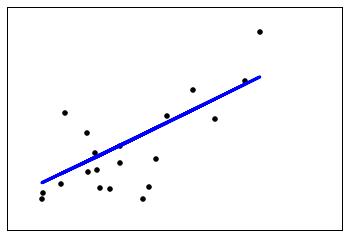

In [110]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, bagging_regressor.predict(diabetes_X_test), color='blue',
         linewidth=3)


plt.xticks(())
plt.yticks(())

plt.show()

Analysis
---

In [ ]:
I applied different Bagged regressor with different regression model
Splitted into 2 jobs in some cases to make processing faster.

Applied below models

>DecisionTreeRegressor
>Gradient Boosting
>SVM
>Ada Boost Regressor
>Ada Boost Regressor with SVM.

THe best performance was given by SVM Model.
Error=2332
Variance Score = .52